Importing the Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [42]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [43]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [44]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [45]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [46]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
Date       2290 non-null object
SPX        2290 non-null float64
GLD        2290 non-null float64
USO        2290 non-null float64
SLV        2290 non-null float64
EUR/USD    2290 non-null float64
dtypes: float64(5), object(1)
memory usage: 107.4+ KB


In [47]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [48]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [49]:
correlation = gold_data.corr()

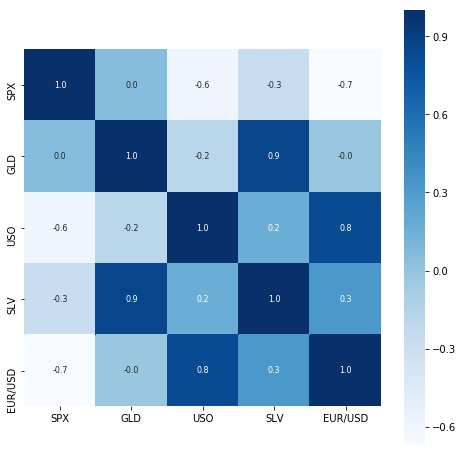

In [50]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [51]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


D:\annaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


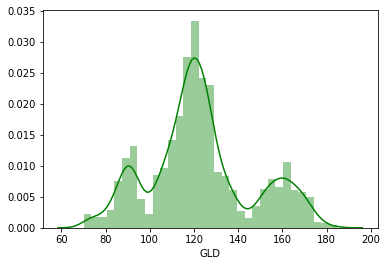

In [52]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [53]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [54]:
print(X)

              SPX        USO        SLV   EUR/USD
0     1447.160034  78.470001  15.180000  1.471692
1     1447.160034  78.370003  15.285000  1.474491
2     1411.630005  77.309998  15.167000  1.475492
3     1416.180054  75.500000  15.053000  1.468299
4     1390.189941  76.059998  15.590000  1.557099
5     1409.130005  75.250000  15.520000  1.466405
6     1420.329956  74.019997  16.061001  1.480100
7     1401.020020  73.089996  16.077000  1.479006
8     1416.250000  74.250000  16.280001  1.486900
9     1380.949951  72.779999  15.834000  1.480210
10    1373.199951  71.849998  15.654000  1.466405
11    1333.250000  71.029999  15.717000  1.464000
12    1325.189941  71.540001  16.030001  1.461796
13    1310.500000  70.550003  15.902000  1.464794
14    1338.599976  69.500000  15.900000  1.463208
15    1352.069946  70.930000  16.299999  1.477410
16    1330.609985  71.910004  16.298000  1.467502
17    1353.959961  72.349998  16.549999  1.478809
18    1362.300049  72.980003  16.534000  1.477192


In [55]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
5        86.550003
6        88.250000
7        88.580002
8        89.540001
9        87.989998
10       86.699997
11       86.500000
12       87.419998
13       88.169998
14       87.889999
15       90.080002
16       90.300003
17       91.750000
18       91.150002
19       92.059998
20       91.400002
21       89.349998
22       89.099998
23       87.680000
24       88.949997
25       89.849998
26       91.000000
27       91.330002
28       89.330002
29       89.440002
           ...    
2260    128.279999
2261    127.489998
2262    125.730003
2263    125.790001
2264    127.260002
2265    126.300003
2266    126.449997
2267    125.800003
2268    126.820000
2269    127.120003
2270    128.110001
2271    126.620003
2272    127.629997
2273    127.750000
2274    127.849998
2275    127.599998
2276    125.620003
2277    126.230003
2278    125.410004
2279    124.970001
2280    124.589996
2281    123.

Splitting into Training data and Test Data

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [57]:
regressor = RandomForestRegressor(n_estimators=100)

In [58]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Model Evaluation

In [59]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [60]:
print(test_data_prediction)

[168.70919967  82.02010001 116.01280015 127.60250119 120.72050179
 154.89749747 150.68279944 126.08280023 117.44509849 126.03940037
 116.72980046 171.49250092 141.62899877 167.34509868 115.13100004
 117.5158007  138.64130326 170.05190044 159.69000314 155.15179961
 155.15129978 124.86599991 176.58889979 157.45640337 125.20570036
  93.81349942  77.21150028 120.95470011 119.10749925 167.37290016
  88.3668007  125.19569973  91.12840079 117.71770003 121.1510997
 136.23060129 115.33280111 115.30480078 146.76360036 107.39130091
 104.37860247  87.14399789 126.42740045 117.99479997 152.72009857
 119.54040004 108.36320034 107.99489817  93.2990007  127.35709691
  75.30919994 113.59009903 121.22620054 111.26999912 118.82699874
 120.7584998  159.07640022 166.91450118 146.97449673  85.80059872
  94.29160059  86.85139917  90.59880033 118.95640089 126.40900059
 127.62680008 170.3627     122.1993996  117.42989911  98.25190006
 168.14460072 143.12509837 132.27100227 121.06150231 120.59819955
 119.673000

In [61]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9887708566252417


Compare the Actual Values and Predicted Values in a Plot

In [62]:
Y_test = list(Y_test)

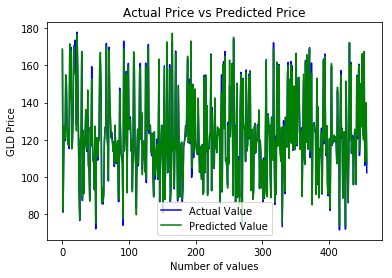

In [63]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()